In [1]:
import pickle
import matplotlib.pyplot as plt

In [2]:
persistence = pickle.load(open('persistence_metrics.dict', 'rb'))
lr = pickle.load(open('lr_metrics.dict', 'rb'))
tree = pickle.load(open('tree_metrics.dict', 'rb'))
mlp = pickle.load(open('mlp_metrics.dict', 'rb'))
rnn = pickle.load(open('rnn_metrics.dict', 'rb'))

model_metrics = [rnn, mlp, tree, lr, persistence]

In [3]:
with open('unified_overall_report.csv', mode='w', encoding='utf-8') as file:
    file.write('dataset,metric,Seq2Seq,MLP,LightGBM,Linear Regression,Persistence\n')
    for dataset in ['gene', 'transplant']:
        for metric in ['mae', 'rmse', 'ndcg']:
            file.write('{},{},{},{},{},{},{}\n'.format(dataset, metric,
                                                    rnn[dataset]['overall'][metric],
                                                    mlp[dataset]['overall'][metric],
                                                    tree[dataset]['overall'][metric],
                                                    lr[dataset]['overall'][metric],
                                                    persistence[dataset]['overall'][metric]))

In [4]:
with open('unified_annual_report.csv', mode='w', encoding='utf-8') as file:
    file.write('dataset,metric,model,year1,year2,year3,year4,year5\n')
    for dataset in ['gene', 'transplant']:
        for metric in ['mae', 'rmse', 'ndcg']:
            for i, model in enumerate(['Seq2Seq', 'MLP', 'LightGBM', 'Linear Regression', 'Persistence']):
                file.write('{},{},{},{},{},{},{},{}\n'.format(dataset, metric, model,
                                                             model_metrics[i][dataset]['annual'][metric][0],
                                                             model_metrics[i][dataset]['annual'][metric][1],
                                                             model_metrics[i][dataset]['annual'][metric][2],
                                                             model_metrics[i][dataset]['annual'][metric][3],
                                                             model_metrics[i][dataset]['annual'][metric][4]))

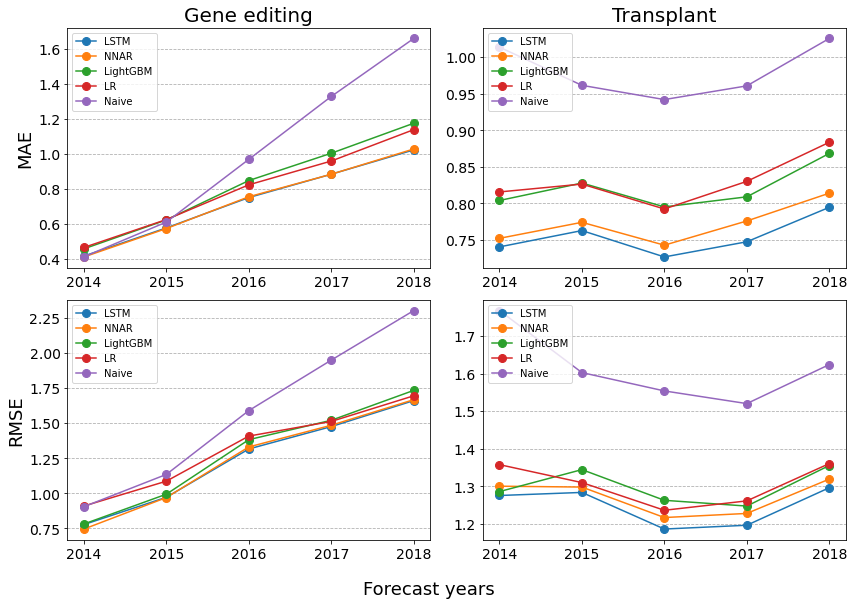

In [53]:
YEARS = list(range(2014, 2019))
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(12,8))
for i, model in enumerate(['LSTM', 'NNAR', 'LightGBM', 'LR', 'Naive']):
    ax1.plot(model_metrics[i]['gene']['annual']['mae'], marker='o', markersize=8, label=model)
    ax1.grid(axis='y', ls='--')
    ax1.set_xticks(range(len(YEARS)))
    ax1.set_xticklabels(YEARS)
#     ax1.set_ylim(0,2)
    ax1.set_ylabel('MAE', fontsize=18)
    ax1.legend()
    ax1.tick_params(axis='both', which='major', labelsize=14)
    ax1.set_title('Gene editing', fontsize=20)
    
    ax2.plot(model_metrics[i]['transplant']['annual']['mae'], marker='o', markersize=8, label=model)
    ax2.grid(axis='y', ls='--')
    ax2.set_xticks(range(len(YEARS)))
    ax2.set_xticklabels(YEARS)
#     ax2.set_ylim(0,2)
    ax2.legend(loc='upper left')
    ax2.tick_params(axis='both', which='major', labelsize=14)
    ax2.set_title('Transplant', fontsize=20)
    
    ax3.plot(model_metrics[i]['gene']['annual']['rmse'], marker='o', markersize=8, label=model)
    ax3.grid(axis='y', ls='--')
    ax3.set_xticks(range(len(YEARS)))
    ax3.set_xticklabels(YEARS)
    ax3.set_ylabel('RMSE', fontsize=18)
    ax3.legend()
    ax3.tick_params(axis='both', which='major', labelsize=14)
    
    
    ax4.plot(model_metrics[i]['transplant']['annual']['rmse'], marker='o', markersize=8, label=model)
    ax4.grid(axis='y', ls='--')
    ax4.set_xticks(range(len(YEARS)))
    ax4.set_xticklabels(YEARS)
#     ax4.set_ylabel('RMSE')
    ax4.legend(loc='upper left')
    ax4.tick_params(axis='both', which='major', labelsize=14)

fig.text(0.5, -0.04, 'Forecast years', ha='center', fontsize=18)
plt.tight_layout()
plt.savefig('annual.jpg')
plt.show()

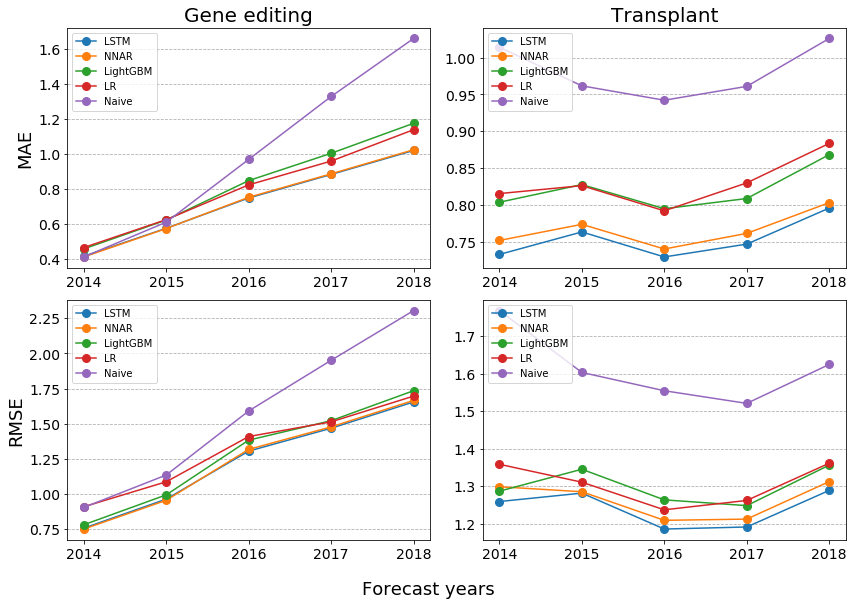

In [3]:
YEARS = list(range(2014, 2019))
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(12,8))
for i, model in enumerate(['LSTM', 'NNAR', 'LightGBM', 'LR', 'Naive']):
    ax1.plot(model_metrics[i]['gene']['annual']['mae'], marker='o', markersize=8, label=model)
    ax1.grid(axis='y', ls='--')
    ax1.set_xticks(range(len(YEARS)))
    ax1.set_xticklabels(YEARS)
#     ax1.set_ylim(0,2)
    ax1.set_ylabel('MAE', fontsize=18)
    ax1.legend()
    ax1.tick_params(axis='both', which='major', labelsize=14)
    ax1.set_title('Gene editing', fontsize=20)
    
    ax2.plot(model_metrics[i]['transplant']['annual']['mae'], marker='o', markersize=8, label=model)
    ax2.grid(axis='y', ls='--')
    ax2.set_xticks(range(len(YEARS)))
    ax2.set_xticklabels(YEARS)
#     ax2.set_ylim(0,2)
    ax2.legend(loc='upper left')
    ax2.tick_params(axis='both', which='major', labelsize=14)
    ax2.set_title('Transplant', fontsize=20)
    
    ax3.plot(model_metrics[i]['gene']['annual']['rmse'], marker='o', markersize=8, label=model)
    ax3.grid(axis='y', ls='--')
    ax3.set_xticks(range(len(YEARS)))
    ax3.set_xticklabels(YEARS)
    ax3.set_ylabel('RMSE', fontsize=18)
    ax3.legend()
    ax3.tick_params(axis='both', which='major', labelsize=14)
    
    
    ax4.plot(model_metrics[i]['transplant']['annual']['rmse'], marker='o', markersize=8, label=model)
    ax4.grid(axis='y', ls='--')
    ax4.set_xticks(range(len(YEARS)))
    ax4.set_xticklabels(YEARS)
#     ax4.set_ylabel('RMSE')
    ax4.legend(loc='upper left')
    ax4.tick_params(axis='both', which='major', labelsize=14)

fig.text(0.5, -0.04, 'Forecast years', ha='center', fontsize=18)
plt.tight_layout()
plt.savefig('annual.jpg')
plt.show()